In [106]:
## Using Non-Linear Features,
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
# Step 1: Generate 10 random 2x2 density matrices

def random_density_matrix(pure=True):
 
    # Generate a random 2x2 density matrix
    if pure:
        # Pure state: |ψ⟩⟨ψ|
        psi = np.random.rand(2) #+ 1j * np.random.rand(2)
        psi /= np.linalg.norm(psi)
        return np.outer(psi, np.conj(psi))
    else:
        # Mixed: convex combination of pure states
        rho1 = random_density_matrix(True)
        rho2 = random_density_matrix(True)
        p = np.random.rand()  # Random probability for mixing
        return p * rho1 + (1 - p) * rho2

X = []
y = []

for _ in range(20):
    rho = random_density_matrix(True)
    X.append(rho)
    y.append(1)  # pure

for _ in range(20):
    rho = random_density_matrix(False)
    X.append(rho)
    y.append(0)  # mixed

# random.seed(42)
# random.shuffle(X)
# random.shuffle(y)

# Step 2: Feature extraction
def rho_to_features(rho):
    # Use real and imaginary parts flattened
    return np.hstack([np.trace(rho),np.trace(rho@rho)])

#[rho[0,0]**2,rho[1,1]**2,rho[0,1]*rho[1,0],rho[0,0]*rho[0,1],rho[0,1]*rho[1,1],rho[0,0]*rho[1,0],rho[1,0]*rho[1,1]]

#[rho[0,0]**2 + rho[0,1]*rho[1,0], rho[0,0]*rho[0,1]+rho[0,1]*rho[1,1], rho[0,0]*rho[1,0]+rho[1,0]*rho[1,1],rho[1,1]**2+rho[0,1]*rho[1,0]]
X_features2D = np.array([rho_to_features(rho) for rho in X])
y = np.array(y)

density_matrix2D = (X_features2D, y)
print(X_features2D.shape, y.shape)

(40, 2) (40,)


In [107]:
def rho_to_features(rho):
    # Use real flattened
    return np.hstack([rho[0,0]**2 + rho[0,1]*rho[1,0], rho[0,0]*rho[0,1]+rho[0,1]*rho[1,1], rho[0,0]*rho[1,0]+rho[1,0]*rho[1,1],rho[1,1]**2+rho[0,1]*rho[1,0]])

#[rho[0,0]**2,rho[1,1]**2,rho[0,1]*rho[1,0],rho[0,0]*rho[0,1],rho[0,1]*rho[1,1],rho[0,0]*rho[1,0],rho[1,0]*rho[1,1]]

#[rho[0,0]**2 + rho[0,1]*rho[1,0], rho[0,0]*rho[0,1]+rho[0,1]*rho[1,1], rho[0,0]*rho[1,0]+rho[1,0]*rho[1,1],rho[1,1]**2+rho[0,1]*rho[1,0]]
X_features4D = np.array([rho_to_features(rho) for rho in X])
y = np.array(y)
# X_features = X_features[:,0:2]
# X_features = X_features[:,0:2]
density_matrix4D = (X_features4D, y)
print(X_features4D.shape, y.shape)

(40, 4) (40,)


In [108]:
def rho_to_features(rho):
    # Use real flattened
    return np.hstack([rho[0,0]**2,rho[1,1]**2,rho[0,1]*rho[1,0],rho[0,0]*rho[0,1],rho[0,1]*rho[1,1],rho[0,0]*rho[1,0],rho[1,0]*rho[1,1]])

#[rho[0,0]**2,rho[1,1]**2,rho[0,1]*rho[1,0],rho[0,0]*rho[0,1],rho[0,1]*rho[1,1],rho[0,0]*rho[1,0],rho[1,0]*rho[1,1]]

#[rho[0,0]**2 + rho[0,1]*rho[1,0], rho[0,0]*rho[0,1]+rho[0,1]*rho[1,1], rho[0,0]*rho[1,0]+rho[1,0]*rho[1,1],rho[1,1]**2+rho[0,1]*rho[1,0]]
X_features7D = np.array([rho_to_features(rho) for rho in X])
y = np.array(y)
# X_features = X_features[:,0:2]
density_matrix7D = (X_features7D, y)
print(X_features7D.shape, y.shape)

(40, 7) (40,)


In [113]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Writing the methods of classifiers in a list
# allows us to iterate over them easily.
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Network",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]
feature = ['2D','4D','7D']
# List of classifiers to be used in the example each with its own parameters.
classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=1, random_state=42),
    SVC(kernel='rbf', C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

datasets = [density_matrix2D, density_matrix4D, density_matrix7D]

# figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):  # enumerate(datasets) returns pairs of (index, element) for each item in datasets.
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    # x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    # y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    # print(feature[i-1])
    # # just plot the dataset first
    # cm = plt.cm.RdBu
    # cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    # ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # if ds_cnt == 0:
    #     ax.set_title("Input data")
    # # Plot the training points
    # ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # # Plot the testing points
    # ax.scatter(
    #     X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    # )
    # ax.set_xlim(x_min, x_max)
    # ax.set_ylim(y_min, y_max)
    # ax.set_xticks(())
    # ax.set_yticks(())
    # i += 1
    print(feature[ds_cnt])
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        # ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        # DecisionBoundaryDisplay.from_estimator(
        #     clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        # )

        # # Plot the training points
        # ax.scatter(
        #     X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        # )
        # # Plot the testing points
        # ax.scatter(
        #     X_test[:, 0],
        #     X_test[:, 1],
        #     c=y_test,
        #     cmap=cm_bright,
        #     edgecolors="k",
        #     alpha=0.6,
        # )

        # ax.set_xlim(x_min, x_max)
        # ax.set_ylim(y_min, y_max)
        # ax.set_xticks(())
        # ax.set_yticks(())
        # if ds_cnt == 0:
        #     ax.set_title(name)
        # ax.text(
        #     x_max - 0.3,
        #     y_min + 0.3,
        #     ("%.2f" % score).lstrip("0"),
        #     size=15,
        #     horizontalalignment="right",
        # )
        
        print(f"{name} score: {score:.2f}")
        i += 1
    
# plt.tight_layout()
# plt.show()

2D
Nearest Neighbors score: 0.94
Linear SVM score: 0.88
RBF SVM score: 0.88
Gaussian Process score: 0.94
Decision Tree score: 0.94
Random Forest score: 0.94
Neural Network score: 0.88
AdaBoost score: 0.94
Naive Bayes score: 0.94
QDA score: 1.00
4D
Nearest Neighbors score: 0.44
Linear SVM score: 0.62
RBF SVM score: 0.56
Gaussian Process score: 0.56
Decision Tree score: 0.62
Random Forest score: 0.62


c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not 

Neural Network score: 0.56
AdaBoost score: 0.56
Naive Bayes score: 0.69
QDA score: 1.00
7D
Nearest Neighbors score: 0.44
Linear SVM score: 0.56
RBF SVM score: 0.62
Gaussian Process score: 0.50
Decision Tree score: 0.50
Random Forest score: 0.69
Neural Network score: 0.69
AdaBoost score: 0.44
Naive Bayes score: 0.75
QDA score: 0.94


c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


# QSVM


In [26]:
## QSVM

# External imports
from pylab import cm
from sklearn import metrics
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.visualization import circuit_drawer
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.optimizers import SPSA
from qiskit_machine_learning.kernels import TrainableFidelityQuantumKernel
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.datasets import ad_hoc_data


In [45]:
class QKTCallback:
    """Callback wrapper class."""

    def __init__(self) -> None:
        self._data = [[] for i in range(5)]

    def callback(self, x0, x1=None, x2=None, x3=None, x4=None):
        """
        Args:
            x0: number of function evaluations
            x1: the parameters
            x2: the function value
            x3: the stepsize
            x4: whether the step was accepted
        """
        self._data[0].append(x0)
        self._data[1].append(x1)
        self._data[2].append(x2)
        self._data[3].append(x3)
        self._data[4].append(x4)

    def get_callback_data(self):
        return self._data

    def clear_callback_data(self):
        self._data = [[] for i in range(5)]

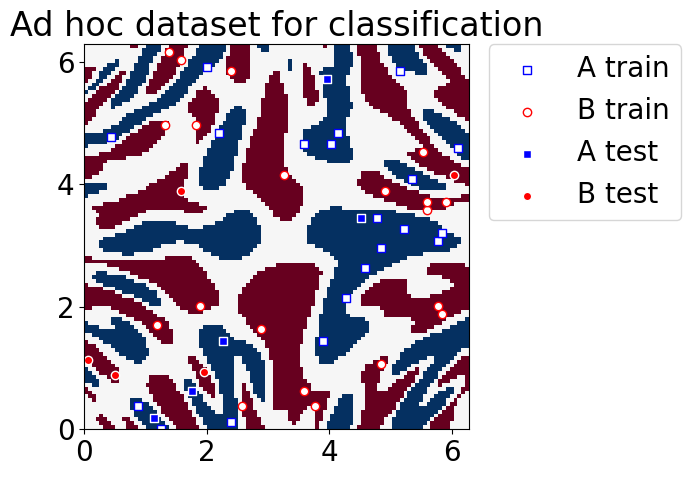

In [46]:
adhoc_dimension = 2
X_train, y_train, X_test, y_test, adhoc_total = ad_hoc_data(
    training_size=20,
    test_size=5,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.imshow(
    np.asmatrix(adhoc_total).T,
    interpolation="nearest",
    origin="lower",
    cmap="RdBu",
    extent=[0, 2 * np.pi, 0, 2 * np.pi],
)

plt.scatter(
    X_train[np.where(y_train[:] == 0), 0],
    X_train[np.where(y_train[:] == 0), 1],
    marker="s",
    facecolors="w",
    edgecolors="b",
    label="A train",
)
plt.scatter(
    X_train[np.where(y_train[:] == 1), 0],
    X_train[np.where(y_train[:] == 1), 1],
    marker="o",
    facecolors="w",
    edgecolors="r",
    label="B train",
)
plt.scatter(
    X_test[np.where(y_test[:] == 0), 0],
    X_test[np.where(y_test[:] == 0), 1],
    marker="s",
    facecolors="b",
    edgecolors="w",
    label="A test",
)
plt.scatter(
    X_test[np.where(y_test[:] == 1), 0],
    X_test[np.where(y_test[:] == 1), 1],
    marker="o",
    facecolors="r",
    edgecolors="w",
    label="B test",
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Ad hoc dataset for classification")

plt.show()

In [48]:
# Create a rotational layer to train. We will rotate each qubit the same amount.
training_params = ParameterVector("θ", 1)
fm0 = QuantumCircuit(2)
fm0.ry(training_params[0], 0)
fm0.ry(training_params[0], 1)

# Use ZZFeatureMap to represent input data
fm1 = ZZFeatureMap(2)

# Create the feature map, composed of our two circuits
fm = fm0.compose(fm1)

print(circuit_drawer(fm))
print(f"Trainable parameters: {training_params}")

     ┌──────────┐┌──────────────────────────┐
q_0: ┤ Ry(θ[0]) ├┤0                         ├
     ├──────────┤│  ZZFeatureMap(x[0],x[1]) │
q_1: ┤ Ry(θ[0]) ├┤1                         ├
     └──────────┘└──────────────────────────┘
Trainable parameters: θ, ['θ[0]']


In [49]:
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit.primitives import StatevectorSampler as Sampler

sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)

# Instantiate quantum kernel
quant_kernel = TrainableFidelityQuantumKernel(
    fidelity=fidelity, feature_map=fm, training_parameters=training_params
)

# Set up the optimizer
cb_qkt = QKTCallback()
spsa_opt = SPSA(maxiter=10, callback=cb_qkt.callback, learning_rate=0.05, perturbation=0.05)

# Instantiate a quantum kernel trainer.
qkt = QuantumKernelTrainer(
    quantum_kernel=quant_kernel, loss="svc_loss", optimizer=spsa_opt, initial_point=[np.pi / 2]
)

In [50]:
# Train the kernel using QKT directly
qka_results = qkt.fit(X_train, y_train)
optimized_kernel = qka_results.quantum_kernel
print(qka_results)

{   'optimal_circuit': None,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): np.float64(1.9248618908412807)},
    'optimal_point': array([1.92486189]),
    'optimal_value': np.float64(10.817660904322473),
    'optimizer_evals': 30,
    'optimizer_result': None,
    'optimizer_time': None,
    'quantum_kernel': <qiskit_machine_learning.kernels.trainable_fidelity_quantum_kernel.TrainableFidelityQuantumKernel object at 0x000001DC75013260>}


In [51]:
# Use QSVC for classification
qsvc = QSVC(quantum_kernel=optimized_kernel)

# Fit the QSVC
qsvc.fit(X_train, y_train)

# Predict the labels
labels_test = qsvc.predict(X_test)

# Evalaute the test accuracy
accuracy_test = metrics.balanced_accuracy_score(y_true=y_test, y_pred=labels_test)
print(f"accuracy test: {accuracy_test}")

accuracy test: 0.9


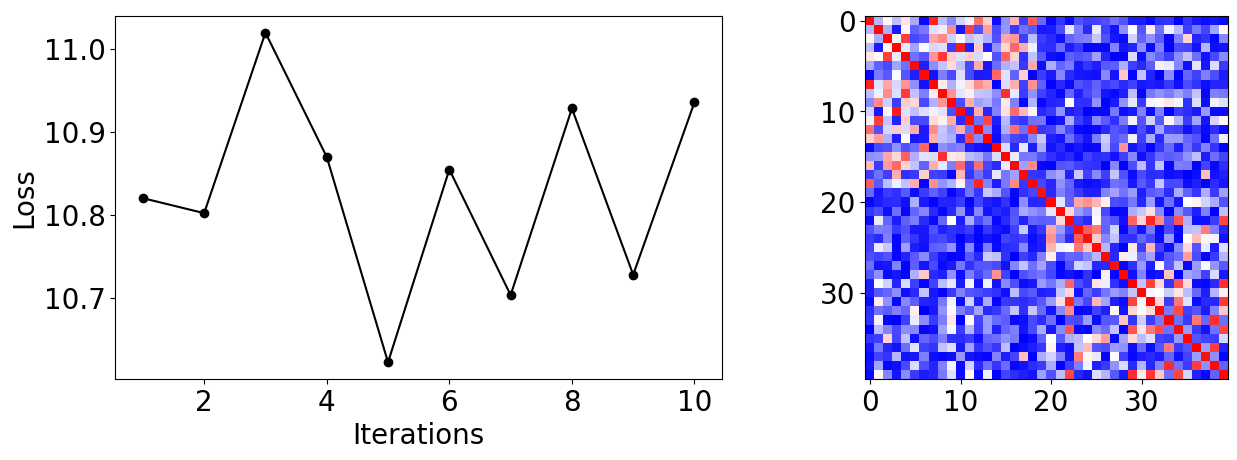

In [52]:
plot_data = cb_qkt.get_callback_data()  # callback data
K = optimized_kernel.evaluate(X_train)  # kernel matrix evaluated on the training samples

plt.rcParams["font.size"] = 20
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot([i + 1 for i in range(len(plot_data[0]))], np.array(plot_data[2]), c="k", marker="o")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Loss")
ax[1].imshow(K, cmap=matplotlib.colormaps["bwr"])
fig.tight_layout()
plt.show()